<a href="https://colab.research.google.com/github/AdityaMVerma/Zeotap/blob/main/ADITYA_VERMA_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

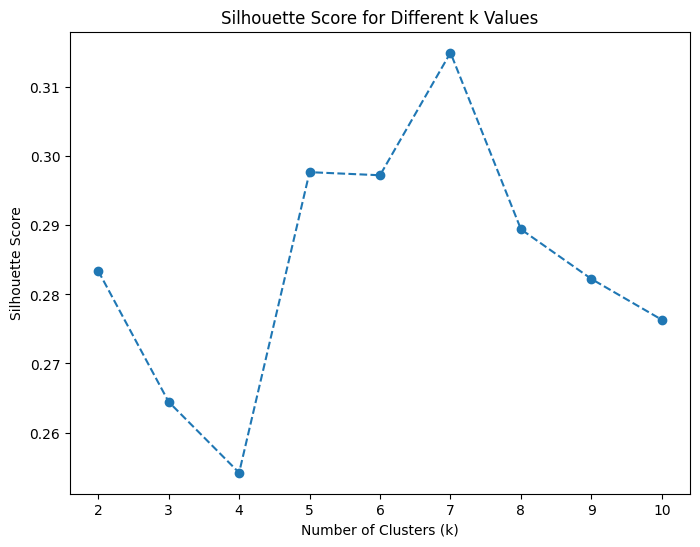

The optimal number of clusters (k) based on the silhouette score is: 7
[0.28341028771750665, 0.2644423158960966, 0.2541808943789095, 0.2977085115953551, 0.2972612564541424, 0.3150055662322247, 0.2894371756773021, 0.28224412622080164, 0.2763300705512418]


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the datasets
customers_df = pd.read_csv('Customers.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Merge customer and transaction data
data = pd.merge(transactions_df, customers_df, on='CustomerID', how='left')

# Aggregate transaction data by CustomerID
customer_transactions = data.groupby('CustomerID').agg(
    TotalSpent=('TotalValue', 'sum'),
    TransactionCount=('TransactionID', 'nunique'),
    AverageTransactionValue=('TotalValue', 'mean')
).reset_index()

# Feature Engineering for customer demographics
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
customers_df['DaysSinceSignup'] = (pd.to_datetime('today') - customers_df['SignupDate']).dt.days

# Merge customer features with transaction features
customer_data = pd.merge(customer_transactions, customers_df[['CustomerID', 'Region', 'DaysSinceSignup']], on='CustomerID', how='left')

# One-hot encode the 'Region' feature
customer_data = pd.concat([customer_data, pd.get_dummies(customer_data['Region'], prefix='Region')], axis=1)

# Standardize the numeric features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['TotalSpent', 'TransactionCount', 'AverageTransactionValue', 'DaysSinceSignup']])

# List to store silhouette scores for different values of k
sil_scores = []

# Try different values of k (2 to 10 clusters)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)

    # Calculate silhouette score for the current k
    score = silhouette_score(scaled_data, kmeans.labels_)
    sil_scores.append(score)

# Plot silhouette scores for each value of k
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sil_scores, marker='o', linestyle='--')
plt.title("Silhouette Score for Different k Values")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

# Find the optimal k (the value with the highest silhouette score)
optimal_k = np.argmax(sil_scores) + 2  # Adding 2 because the range starts at 2
print(f"The optimal number of clusters (k) based on the silhouette score is: {optimal_k}")

# Apply K-Means Clustering with the chosen number of clusters (optimal_k)
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)
print(sil_scores)

Davies-Bouldin Index for k=7: 1.0238041373203535

Cluster sizes:
Cluster 0: 18 customers
Cluster 1: 46 customers
Cluster 2: 17 customers
Cluster 3: 49 customers
Cluster 4: 19 customers
Cluster 5: 27 customers
Cluster 6: 23 customers


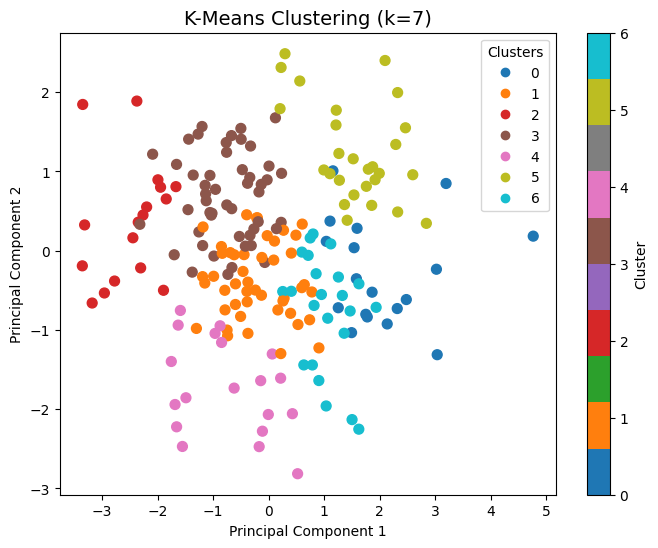

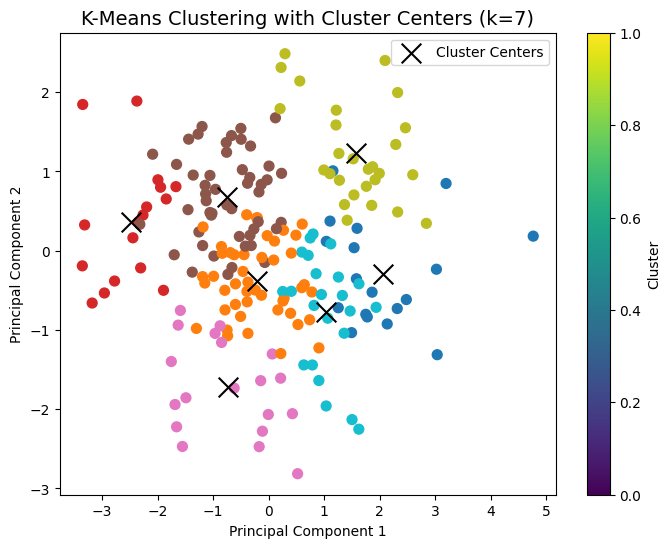

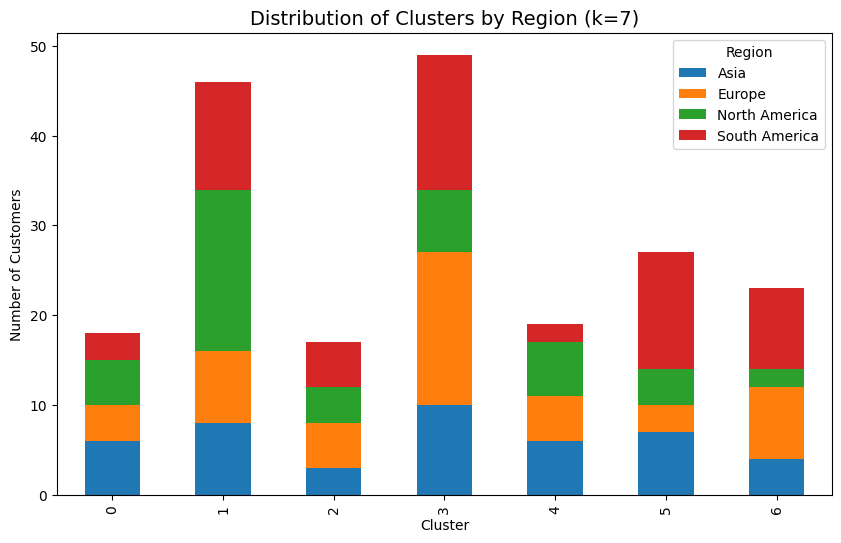

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Load the datasets
customers_df = pd.read_csv('Customers.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Merge customer and transaction data
data = pd.merge(transactions_df, customers_df, on='CustomerID', how='left')

# Aggregate transaction data by CustomerID
customer_transactions = data.groupby('CustomerID').agg(
    TotalSpent=('TotalValue', 'sum'),
    TransactionCount=('TransactionID', 'nunique'),
    AverageTransactionValue=('TotalValue', 'mean')
).reset_index()

# Feature Engineering for customer demographics
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
customers_df['DaysSinceSignup'] = (pd.to_datetime('today') - customers_df['SignupDate']).dt.days

# Merge customer features with transaction features
customer_data = pd.merge(customer_transactions, customers_df[['CustomerID', 'Region', 'DaysSinceSignup']], on='CustomerID', how='left')

# One-hot encode the 'Region' feature
customer_data = pd.concat([customer_data, pd.get_dummies(customer_data['Region'], prefix='Region')], axis=1)

# Standardize the numeric features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['TotalSpent', 'TransactionCount', 'AverageTransactionValue', 'DaysSinceSignup']])

# K-Means Clustering with the optimal value of k (Assuming optimal_k = 7)
optimal_k = 7  # Replace with your actual optimal k value

# Apply K-Means with optimal_k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_data, customer_data['Cluster'])
print(f'Davies-Bouldin Index for k={optimal_k}: {db_index}')

# Print cluster sizes
print("\nCluster sizes:")
cluster_sizes = customer_data['Cluster'].value_counts().sort_index()  # Sort by cluster index for better readability
for cluster, size in cluster_sizes.items():
    print(f"Cluster {cluster}: {size} customers")

# Visualizing the Clusters

# 1. Visualize the clusters in a 2D scatter plot using PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Plotting the clusters with different colors for each cluster
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_components[:, 0], pca_components[:, 1], c=customer_data['Cluster'], cmap='tab10', s=50)

# Adding a color legend
plt.legend(*scatter.legend_elements(), title="Clusters")

plt.title(f'K-Means Clustering (k={optimal_k})', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# 2. Plotting the cluster centers with distinct colors
centers = pca.transform(kmeans.cluster_centers_)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_components[:, 0], pca_components[:, 1], c=customer_data['Cluster'], cmap='tab10', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='x', s=200, label='Cluster Centers')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title(f'K-Means Clustering with Cluster Centers (k={optimal_k})', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

# 3. Visualizing the distribution of clusters by Region (bar plot)
cluster_region_counts = customer_data.groupby(['Cluster', 'Region']).size().unstack().fillna(0)
cluster_region_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title(f'Distribution of Clusters by Region (k={optimal_k})', fontsize=14)
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()
